# WGAN-GP Training

## imports

In [142]:
%matplotlib inline

import os
import matplotlib.pyplot as plt

from models.WGANGP import WGANGP
from utils.loaders import load_dataset

import pickle
import tensorflow as tf

In [143]:
# run params
SECTION = 'gan'
RUN_ID = '0003'
DATA_NAME = 'dataset64'
RUN_FOLDER = 'run/{}/'.format(SECTION)
RUN_FOLDER += '_'.join([RUN_ID, DATA_NAME])

if not os.path.exists(RUN_FOLDER):
    os.mkdir(RUN_FOLDER)
    os.mkdir(os.path.join(RUN_FOLDER, 'viz'))
    os.mkdir(os.path.join(RUN_FOLDER, 'images'))
    os.mkdir(os.path.join(RUN_FOLDER, 'weights'))

mode =  'build' #'load' #

In [144]:
print(tf.__version__)

1.15.5


## data

In [145]:
BATCH_SIZE = 64
IMAGE_SIZE = 64

In [146]:
x_train = load_dataset(DATA_NAME, IMAGE_SIZE, BATCH_SIZE)

Found 20000 images belonging to 1 classes.
64


In [147]:
x_train[0][0][0]

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]], dtype=float32)

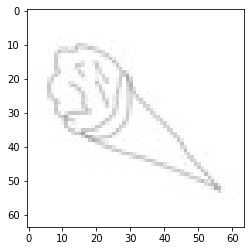

In [148]:
plt.imshow((x_train[0][0][0]+1)/2)

## architecture

In [149]:
gan = WGANGP(input_dim = (IMAGE_SIZE,IMAGE_SIZE,3)
        , critic_conv_filters = [64,128,256,512]
        , critic_conv_kernel_size = [5,5,5,5]
        , critic_conv_strides = [2,2,2,2]
        , critic_batch_norm_momentum = None
        , critic_activation = 'leaky_relu'
        , critic_dropout_rate = None
        , critic_learning_rate = 0.0002
        , generator_initial_dense_layer_size = (4, 4, 512)
        , generator_upsample = [1,1,1,1]
        , generator_conv_filters = [256,128,64,3]
        , generator_conv_kernel_size = [5,5,5,5]
        , generator_conv_strides = [2,2,2,2]
        , generator_batch_norm_momentum = 0.9
        , generator_activation = 'leaky_relu'
        , generator_dropout_rate = None
        , generator_learning_rate = 0.0002
        , optimiser = 'adam'
        , grad_weight = 10
        , z_dim = 100
        , batch_size = BATCH_SIZE
        )

if mode == 'build':
    gan.save(RUN_FOLDER)

else:
    gan.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))


(64, 64, 3)


In [150]:
gan.critic.summary()

Model: "model_46"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
critic_input (InputLayer)    [(None, 64, 64, 3)]       0         
_________________________________________________________________
critic_conv_0 (Conv2D)       multiple                  4864      
_________________________________________________________________
leaky_re_lu_96 (LeakyReLU)   multiple                  0         
_________________________________________________________________
critic_conv_1 (Conv2D)       multiple                  204928    
_________________________________________________________________
leaky_re_lu_97 (LeakyReLU)   multiple                  0         
_________________________________________________________________
critic_conv_2 (Conv2D)       multiple                  819456    
_________________________________________________________________
leaky_re_lu_98 (LeakyReLU)   multiple                  0  

In [151]:
gan.generator.summary()

Model: "model_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
generator_input (InputLayer) [(None, 100)]             0         
_________________________________________________________________
dense_25 (Dense)             (None, 8192)              827392    
_________________________________________________________________
batch_normalization_48 (Batc (None, 8192)              32768     
_________________________________________________________________
leaky_re_lu_100 (LeakyReLU)  (None, 8192)              0         
_________________________________________________________________
reshape_12 (Reshape)         (None, 4, 4, 512)         0         
_________________________________________________________________
generator_conv_0 (Conv2DTran (None, 8, 8, 256)         3277056   
_________________________________________________________________
batch_normalization_49 (Batc (None, 8, 8, 256)         102

## training

In [152]:
EPOCHS = 6501
PRINT_EVERY_N_BATCHES = 500
N_CRITIC = 5
BATCH_SIZE = 64

In [153]:
gan.train(     
    x_train
    , batch_size = BATCH_SIZE
    , epochs = EPOCHS
    , run_folder = RUN_FOLDER
    , print_every_n_batches = PRINT_EVERY_N_BATCHES
    , n_critic = N_CRITIC
    , using_generator = True
)

0 (5, 1) [D loss: (-10.8)(R -15.8, F -0.3, G 0.5)] [G loss: 0.5]
1 (5, 1) [D loss: (-220.6)(R -397.0, F 26.2, G 15.0)] [G loss: -29.1]
2 (5, 1) [D loss: (-288.9)(R -541.1, F 40.8, G 21.1)] [G loss: -37.5]
3 (5, 1) [D loss: (-294.5)(R -535.9, F 51.0, G 19.0)] [G loss: -51.7]
4 (5, 1) [D loss: (-287.3)(R -554.5, F 68.5, G 19.9)] [G loss: -60.7]
5 (5, 1) [D loss: (-261.8)(R -661.6, F 105.7, G 29.4)] [G loss: -16.9]
6 (5, 1) [D loss: (-263.2)(R -518.7, F 88.8, G 16.7)] [G loss: -98.2]
7 (5, 1) [D loss: (-248.8)(R -502.8, F 100.8, G 15.3)] [G loss: -103.2]
8 (5, 1) [D loss: (-236.6)(R -495.3, F 112.9, G 14.6)] [G loss: -121.2]
9 (5, 1) [D loss: (-218.5)(R -476.0, F 123.6, G 13.4)] [G loss: -131.3]
10 (5, 1) [D loss: (-205.2)(R -464.9, F 135.6, G 12.4)] [G loss: -142.9]
11 (5, 1) [D loss: (-192.0)(R -469.8, F 152.7, G 12.5)] [G loss: -149.5]
12 (5, 1) [D loss: (-179.7)(R -450.3, F 158.3, G 11.2)] [G loss: -159.2]
13 (5, 1) [D loss: (-168.3)(R -429.6, F 161.9, G 9.9)] [G loss: -170.6]
14 (5, 

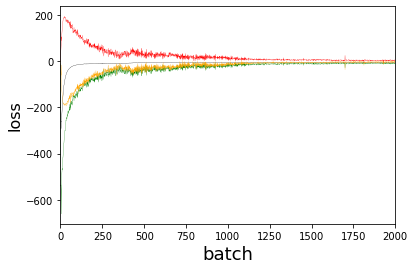

In [154]:
fig = plt.figure()
plt.plot([x[0] for x in gan.d_losses], color='black', linewidth=0.25)

plt.plot([x[1] for x in gan.d_losses], color='green', linewidth=0.25)
plt.plot([x[2] for x in gan.d_losses], color='red', linewidth=0.25)
plt.plot(gan.g_losses, color='orange', linewidth=0.25)

plt.xlabel('batch', fontsize=18)
plt.ylabel('loss', fontsize=16)

plt.xlim(0, 2000)
# plt.ylim(0, 2)

plt.show()
